In [9]:
#importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

#cargamos el dataset jamboree
ruta = r'C:/Users/matia/OneDrive/Escritorio/Curso_The_Corner/jamboree/jamboree_dataset.csv'
df = pd.read_csv(ruta) 
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
#cambiamos el nombre de las columnas
df = df.rename(columns={'Serial No.':'SERIALNUMBER', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating': 'UNIVERSITYRATING', 'Research':'RESEARCH', 'Chance of Admit ':'CHANCEOFADMIT'})
df.head()

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
#creamos la columna ADMIT para definir si la persona fue admitida o no en la universidad.
#Esto sirve para predecir el resultado con nuevos ingresos de datos.
#Luego eliminamos CHANCEOFADMIT ya que no continuaremos utilizandola.
admitidos = []
for i in df['CHANCEOFADMIT'].values:
    opciones = [1, 0]
    probabilidades = [i, 1-i]
    eleccion = np.random.choice(opciones, p=probabilidades)
    admitidos.append(eleccion)
df['ADMIT'] = admitidos
df.head()

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT,ADMIT
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [12]:
df = df.drop(['CHANCEOFADMIT'], axis=1)

In [13]:
df['ADMIT'].value_counts()

1    361
0    139
Name: ADMIT, dtype: int64

In [14]:
#vamos a entrenar un modelo para predecir si una persona será admitida o no en base a los datos ingresados
#en las demas columnas. Para esto debemos tomar valores de pruebas.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
y = df['ADMIT']
df = df.drop(['ADMIT'], axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#vemos la precision:
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 79.0 %


In [15]:
X_train.shape

(400, 8)

In [16]:
X_test.shape

(100, 8)

In [17]:
y_train.value_counts()


1    286
0    114
Name: ADMIT, dtype: int64

<AxesSubplot:>

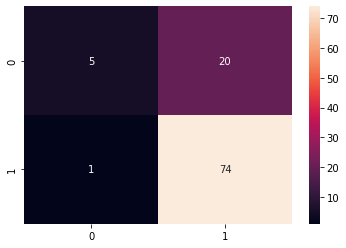

In [18]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.20      0.32        25
           1       0.79      0.99      0.88        75

    accuracy                           0.79       100
   macro avg       0.81      0.59      0.60       100
weighted avg       0.80      0.79      0.74       100



In [20]:
#Utilizamos random forest en vez de regresión logística
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model.predict(X_test)

<AxesSubplot:>

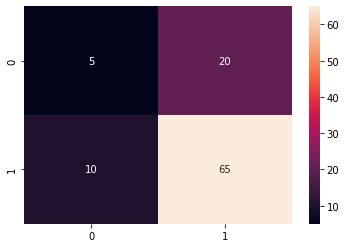

In [22]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25        25
           1       0.76      0.87      0.81        75

    accuracy                           0.70       100
   macro avg       0.55      0.53      0.53       100
weighted avg       0.66      0.70      0.67       100

